In [1]:
from sqlalchemy import create_engine
import pymysql

sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1/nlp_with_disaster_tweets', pool_recycle=3600)
dbConnection    = sqlEngine.connect()

In [44]:
%run package_import.ipynb
%run data_profiling.ipynb

In [4]:
df_train = pd.read_sql_query(
    '''
    select *
    from raw_train
    '''

,dbConnection)
df_train.head()

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,None,None,"13,000 people receive #wildfires evacuation orders in California",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


### profile counts for the column target

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

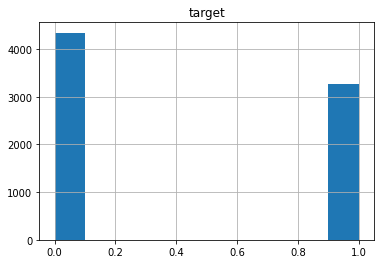

In [10]:
df_train.hist(column='target')

### histogram for characters in tweets

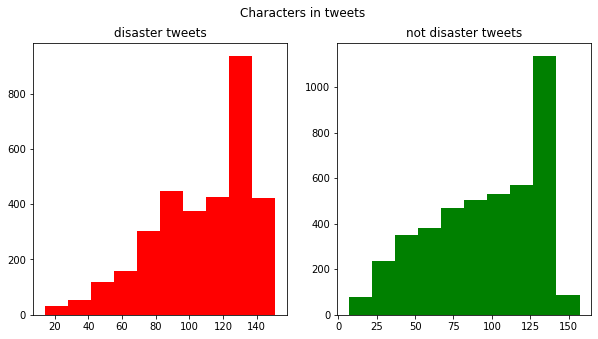

In [28]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
train_disaster_len = df_train[df_train['target']==1]['text'].str.len()
ax1.hist(train_disaster_len,color='red')
ax1.set_title('disaster tweets')
train_non_disaster_len = df_train[df_train['target']==0]['text'].str.len()
ax2.hist(train_non_disaster_len,color='green')
ax2.set_title('not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

### histogram for number of words in tweets

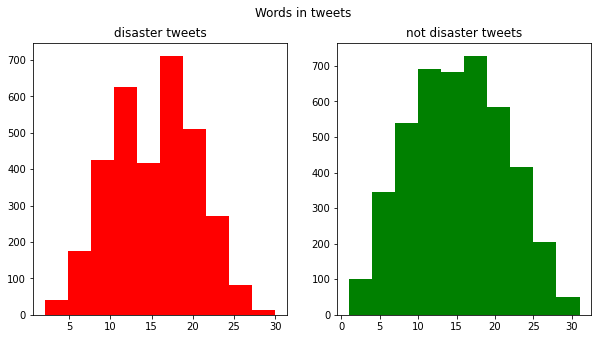

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
train_disaster_words = df_train[df_train['target']==1]['text'].apply(lambda x: len(x.split()))
ax1.hist(train_disaster_words,color='red')
ax1.set_title('disaster tweets')
train_non_disaster_words = df_train[df_train['target']==0]['text'].apply(lambda x: len(x.split()))
ax2.hist(train_non_disaster_words,color='green')
ax2.set_title('not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()

In [29]:
df_train.head()

,id,keyword,location,text,target
0,1,None,None,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,None,None,Forest fire near La Ronge Sask. Canada,1
2,5,None,None,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,None,None,"13,000 people receive #wildfires evacuation orders in California",1
4,7,None,None,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


/Users/liuyifu/github_projects/nlp_with_disaster_tweets/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liuyifu/github_projects/nlp_with_disaster_tweets/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


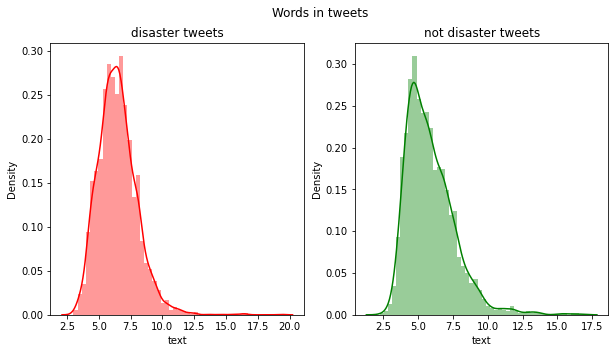

In [46]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
train_disaster_avg_words = df_train[df_train['target']==1]['text'].apply(
    lambda x: np.mean([len(i) for i in x.split()])
    )
sns.distplot(train_disaster_avg_words,color='red', ax=ax1)
ax1.set_title('disaster tweets')
train_non_disaster_avg_words = df_train[df_train['target']==0]['text'].apply(
    lambda x: np.mean([len(i) for i in x.split()])
    )
sns.distplot(train_non_disaster_avg_words,color='green', ax=ax2)
ax2.set_title('not disaster tweets')
fig.suptitle('Words in tweets')
plt.show()